# Line detection for 1 image

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

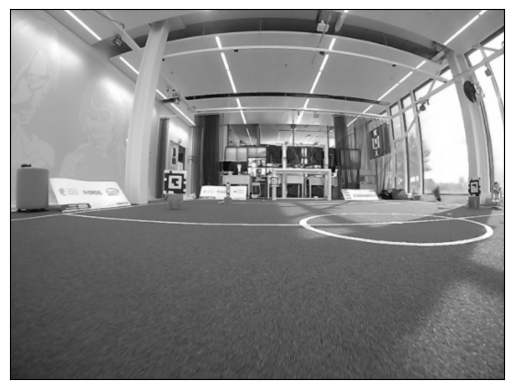

In [ ]:
# Selecting an image to work with
display = cv2.imread("images/field.png")
image = cv2.cvtColor(display, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()

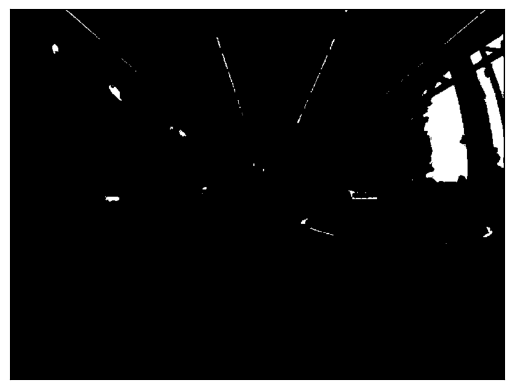

In [28]:
# Binarize
_, binary = cv2.threshold(image, 250, 255, cv2.THRESH_BINARY)
plt.imshow(binary, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()

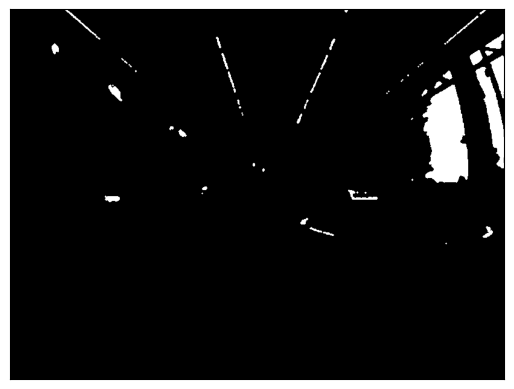

In [ ]:
# Dilatation
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
binary = cv2.dilate(binary, kernel, iterations=1)
plt.imshow(binary, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()

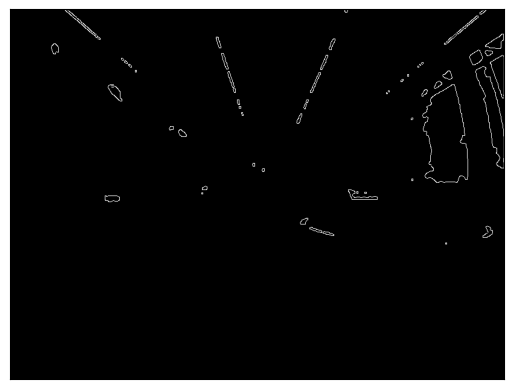

In [30]:
# Canny Edge Detection
canny = cv2.Canny(binary, 0, 255) # input is binary so thresholds are irrelevant
plt.imshow(canny, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()

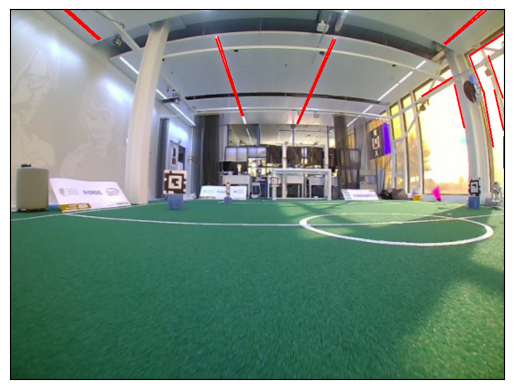

In [ ]:
# Hough Transform
lines = cv2.HoughLinesP(canny, 1, np.pi/180, 30, minLineLength=50, maxLineGap=15)
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(display, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.imshow(display, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()

# Rinse & Repeat for more images

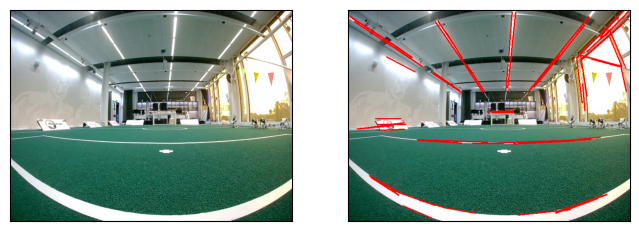

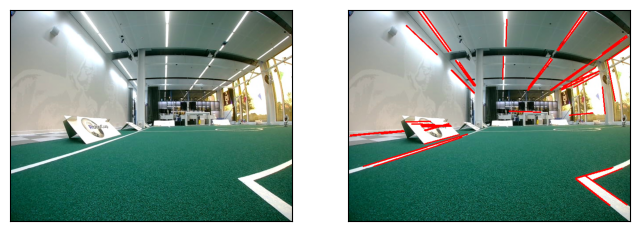

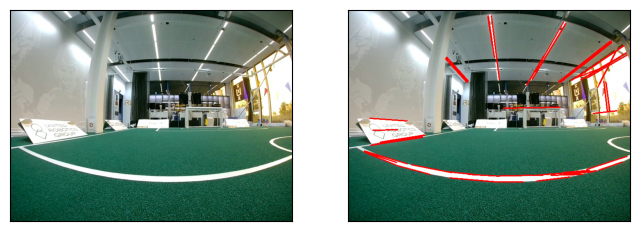

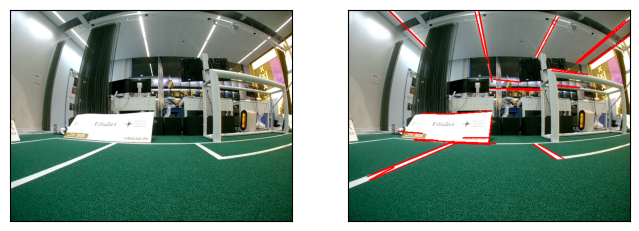

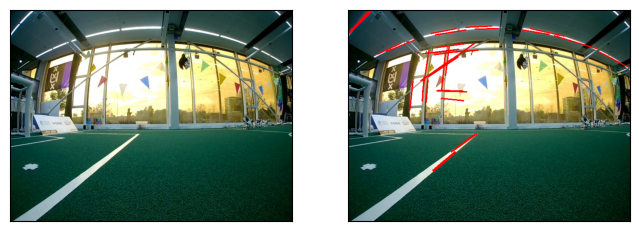

In [ ]:
for i in range(5):
    original = cv2.imread(f"images/frame000{i}.jpg")
    image = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    _, image = cv2.threshold(image, 250, 255, cv2.THRESH_BINARY)
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.Canny(image, 0, 255)
    lines = cv2.HoughLinesP(image, 1, np.pi/180, 30, minLineLength=50, maxLineGap=15)
    display = original.copy()
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(display, (x1, y1), (x2, y2), (255, 0, 0), 2)
    fig, ax = plt.subplots(1, 2, figsize=(8, 10))
    ax[0].imshow(original)
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[1].imshow(display)
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    plt.show()